In [1]:
from qiskit.extensions import *
from qiskit import QuantumCircuit, ClassicalRegister, execute, Aer, IBMQ, transpile
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import Operator
from qiskit.providers.aer.library import save_statevector
from qiskit_textbook.tools import *
import numpy as np
import random

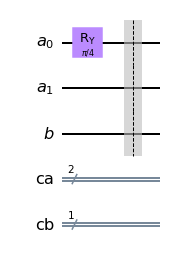

In [2]:
alice = QuantumRegister(2, 'a')
bob = QuantumRegister(1, 'b')
cr_alice = ClassicalRegister(2, 'ca')
cr_bob = ClassicalRegister(1, 'cb')

qc = QuantumCircuit(alice, bob, cr_alice, cr_bob)

qc.ry(np.pi/4, alice[0])
qc.barrier()
qc.draw('mpl')

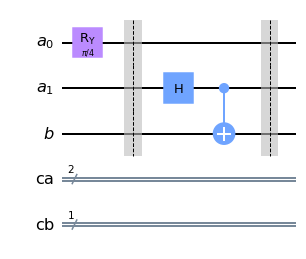

In [3]:
qc.h(alice[1])
qc.cx(alice[1],bob[0])
qc.barrier()
qc.draw('mpl')

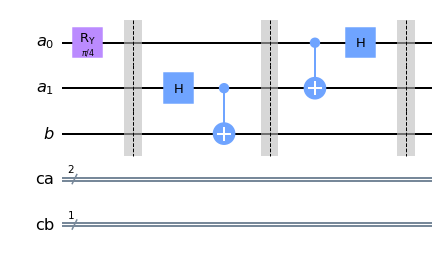

In [4]:
qc.cx(alice[0],alice[1])
qc.h(alice[0])

qc.barrier()

qc.draw('mpl')

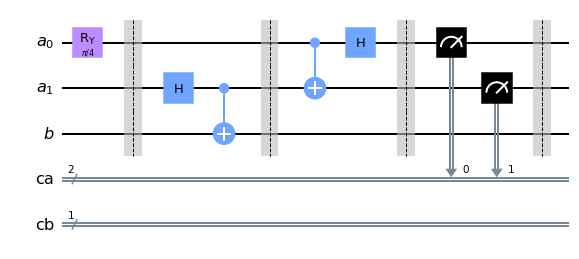

In [5]:
qc.measure(alice, cr_alice)
qc.barrier()
qc.draw('mpl')

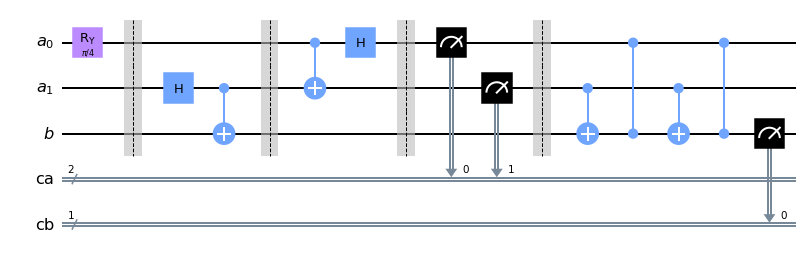

In [7]:
qc.cx(alice[1], bob[0])
qc.cz(alice[0], bob[0])
qc.measure(bob, cr_bob)
qc.draw('mpl')

In [11]:
n = 3
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc,backend=simulator, shots= 10000).result().get_statevector()
states = [format(i,'0'+str(n)+'b')[::-1] for i in range (2**n)]

print(states)
res = [round(i.real, 5) for i in result]
array_to_latex(result)

['000', '100', '010', '110', '001', '101', '011', '111']


/tmp/ipykernel_47831/3390486679.py:7: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  res = [round(i.real, 5) for i in result]


<IPython.core.display.Math object>

In [12]:
n =3
states = [format(i, '0'+str(n)+'b')[::-1] for i in range(2**n)]

medida = [(j,i) for i,j in zip(res,states) if i>0]

print(f'\n\nAlice mediu {medida[0][0][:2]} o estado que está com Bob é [{medida[0][1]}{medida[1][1]}]\n\n')

IndexError: list index out of range